In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

In [ ]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/data.csv', names=['x1-t1', 'y1-t1','z1-t1','x2-t1', 'y2-t1','z2-t1','x1_rotacion-t1','y1_rotacion-t1','z1_rotacion-t1','x2_rotacion-t1','y2_rotacion-t1','z2_rotacion-t1','x1-t2', 'y1-t2','z1-t2','x2-t2', 'y2-t2','z2-t2','x1_rotacion-t2','y1_rotacion-t2','z1_rotacion-t2','x2_rotacion-t2','y2_rotacion-t2','z2_rotacion-t2', 'x1-t3', 'y1-t3','z1-t3','x2-t3', 'y2-t3','z2-t3','x1_rotacion-t3','y1_rotacion-t3','z1_rotacion-t3','x2_rotacion-t3','y2_rotacion-t3','z2_rotacion-t3', 'x1-t4', 'y1-t4','z1-t4','x2-t4', 'y2-t4','z2-t4','x1_rotacion-t4','y1_rotacion-t4','z1_rotacion-t4','x2_rotacion-t4','y2_rotacion-t4','z2_rotacion-t4', 'x1-t5', 'y1-t5','z1-t5','x2-t5', 'y2-t5','z2-t5','x1_rotacion-t5','y1_rotacion-t5','z1_rotacion-t5','x2_rotacion-t5','y2_rotacion-t5','z2_rotacion-t5', 'x1-t6', 'y1-t6','z1-t6','x2-t6', 'y2-t6','z2-t6','x1_rotacion-t6','y1_rotacion-t6','z1_rotacion-t6','x2_rotacion-t6','y2_rotacion-t6','z2_rotacion-t6', 'x1-t7', 'y1-t7','z1-t7','x2-t7', 'y2-t7','z2-t7','x1_rotacion-t7','y1_rotacion-t7','z1_rotacion-t7','x2_rotacion-t7','y2_rotacion-t7','z2_rotacion-t7', 'x1-t8', 'y1-t8','z1-t8','x2-t8', 'y2-t8','z2-t8','x1_rotacion-t8','y1_rotacion-t8','z1_rotacion-t8','x2_rotacion-t8','y2_rotacion-t8','z2_rotacion-t8', 'direccion','velocidad'])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
data = df[['x1-t1', 'y1-t1','z1-t1','x2-t1', 'y2-t1','z2-t1','x1_rotacion-t1','y1_rotacion-t1','z1_rotacion-t1','x2_rotacion-t1','y2_rotacion-t1','z2_rotacion-t1','x1-t2', 'y1-t2','z1-t2','x2-t2', 'y2-t2','z2-t2','x1_rotacion-t2','y1_rotacion-t2','z1_rotacion-t2','x2_rotacion-t2','y2_rotacion-t2','z2_rotacion-t2', 'x1-t3', 'y1-t3','z1-t3','x2-t3', 'y2-t3','z2-t3','x1_rotacion-t3','y1_rotacion-t3','z1_rotacion-t3','x2_rotacion-t3','y2_rotacion-t3','z2_rotacion-t3', 'x1-t4', 'y1-t4','z1-t4','x2-t4', 'y2-t4','z2-t4','x1_rotacion-t4','y1_rotacion-t4','z1_rotacion-t4','x2_rotacion-t4','y2_rotacion-t4','z2_rotacion-t4', 'x1-t5', 'y1-t5','z1-t5','x2-t5', 'y2-t5','z2-t5','x1_rotacion-t5','y1_rotacion-t5','z1_rotacion-t5','x2_rotacion-t5','y2_rotacion-t5','z2_rotacion-t5', 'x1-t6', 'y1-t6','z1-t6','x2-t6', 'y2-t6','z2-t6','x1_rotacion-t6','y1_rotacion-t6','z1_rotacion-t6','x2_rotacion-t6','y2_rotacion-t6','z2_rotacion-t6', 'x1-t7', 'y1-t7','z1-t7','x2-t7', 'y2-t7','z2-t7','x1_rotacion-t7','y1_rotacion-t7','z1_rotacion-t7','x2_rotacion-t7','y2_rotacion-t7','z2_rotacion-t7', 'x1-t8', 'y1-t8','z1-t8','x2-t8', 'y2-t8','z2-t8','x1_rotacion-t8','y1_rotacion-t8','z1_rotacion-t8','x2_rotacion-t8','y2_rotacion-t8','z2_rotacion-t8']].values

In [ ]:
#se añade padding a los datos de entrada para que el tamaño total por muestra sea 3072
data_padded = np.pad(data, ((0, 0), (0, 3072 - 96)), mode='constant')

In [ ]:
#Se cambia la forma de los datos para que sea compatible con redes convoluconales
X_image = data_padded.reshape(-1, 32, 32, 3)

In [ ]:
print("Forma de X_image después de repetición:", X_image.shape) # 1023 filas, imágenes de 32x32 en 3 canales

Forma de X_image después de repetición: (1023, 32, 32, 3)


In [ ]:
# Separar las salidas: dirección (categorías) y velocidad (continuo)
y_direction = df['direccion'].values  # Columna con etiquetas de dirección
y_speed = df['velocidad'].values     # Columna con valores de velocidad

In [ ]:

# Cargar MobileNet sin las capas finales (top=False)
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Agregar nuevas capas para la predicción de dirección y velocidad
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Agregar una capa de pooling global

#capa de regularización para el intento 2
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.01))(x)

#capa de Dropout para el intento 2
x = Dropout(0.5)(x)

 # Predicción de dirección
direction_output = Dense(3, activation='softmax', name='direction')(x)

# Predicción de velocidad
speed_output = Dense(1, activation='linear', name='speed')(x)

# Crear el modelo final
model = Model(inputs=base_model.input, outputs=[direction_output, speed_output])

# Congelar las capas base para evitar que se entrenen
for layer in base_model.layers:
    layer.trainable = False

# Compilar el modelo
model.compile(
    optimizer = Adam(learning_rate=0.0001),
    loss={'direction': 'sparse_categorical_crossentropy', 'speed': 'mse'},
    metrics={'direction': 'accuracy', 'speed': 'mae'})

# Ver resumen del modelo
model.summary()


<ipython-input-9-0d0d1df2c94d>:4: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 32, 32, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1 (Conv2D)            │ (None, 16, 16, 32)     │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 16, 16, 32)     │            128 │ conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (ReLU)         │ (None, 16, 16, 32)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_dw_1                 │ (None, 16, 16, 32)     │            288 │ conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_dw_1_bn              │ (None, 16, 16, 32)     │            128 │ conv_dw_1[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_dw_1_relu (ReLU)     │ (None, 16, 16, 32)     │              0 │ conv_dw_1_bn[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_pw_1 (Conv2D)        │ (None, 16, 16, 64)     │          2,048 │ conv_dw_1_relu[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_pw_1_bn              │ (None, 16, 16, 64)     │            256 │ conv_pw_1[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_pw_1_relu (ReLU)     │ (None, 16, 16, 64)     │              0 │ conv_pw_1_bn[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_pad_2                │ (None, 17, 17, 64)     │              0 │ conv_pw_1_relu[0][0]   │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_dw_2                 │ (None, 8, 8, 64)       │            576 │ conv_pad_2[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_dw_2_bn              │ (None, 8, 8, 64)       │            256 │ conv_dw_2[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_dw_2_relu (ReLU)     │ (None, 8, 8, 64)       │              0 │ conv_dw_2_bn[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_pw_2 (Conv2D)        │ (None, 8, 8, 128)      │          8,192 │ conv_dw_2_relu[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_pw_2_bn              │ (None, 8, 8, 128)      │            512 │ conv_pw_2[0][0]        │
│ (BatchNormalization) 

 Total params: 4,282,564 (16.34 MB)

 Trainable params: 1,053,700 (4.02 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [ ]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train_image, X_test_image, y_train_direction, y_test_direction, y_train_speed, y_test_speed = train_test_split(
    X_image,
    y_direction,
    y_speed,
    test_size=0.2,
    random_state=42
)


In [ ]:
history = model.fit(
    X_train_image,
    {'direction': y_train_direction, 'speed': y_train_speed},
    validation_split=0.2,
    epochs=50,
    batch_size=32
)


Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - direction_accuracy: 0.4556 - direction_loss: 1.0573 - loss: 2575.7998 - speed_loss: 2566.0830 - speed_mae: 34.4467 - val_direction_accuracy: 0.7622 - val_direction_loss: 0.9550 - val_loss: 1953.3594 - val_speed_loss: 1838.9996 - val_speed_mae: 26.3009
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - direction_accuracy: 0.6395 - direction_loss: 0.9779 - loss: 2455.5571 - speed_loss: 2445.5979 - speed_mae: 33.0803 - val_direction_accuracy: 0.7622 - val_direction_loss: 0.8710 - val_loss: 1949.6176 - val_speed_loss: 1835.9108 - val_speed_mae: 26.3608
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - direction_accuracy: 0.7061 - direction_loss: 0.8935 - loss: 2449.1460 - speed_loss: 2442.1460 - speed_mae: 32.7178 - val_direction_accuracy: 0.7622 - val_direction_loss: 0.8140 - val_loss: 1946.1769 - val_speed_loss: 1833.0316 - val_speed_mae: 26.4134
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - direction_accuracy: 0.7063 - dir

In [ ]:
# Evaluar el modelo
results = model.evaluate(X_test_image, {'direction': y_test_direction, 'speed': y_test_speed})

# Mostrar resultados
print("Pérdida total:", results[0])
print("Pérdida de dirección:", results[1])
print("Pérdida de velocidad:", results[2])


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - direction_accuracy: 0.7210 - direction_loss: 0.7393 - loss: 2274.8208 - speed_loss: 2283.8303 - speed_mae: 32.8240
Pérdida total: 2247.502685546875
Pérdida de dirección: 0.7743839025497437
Pérdida de velocidad: 2286.083740234375


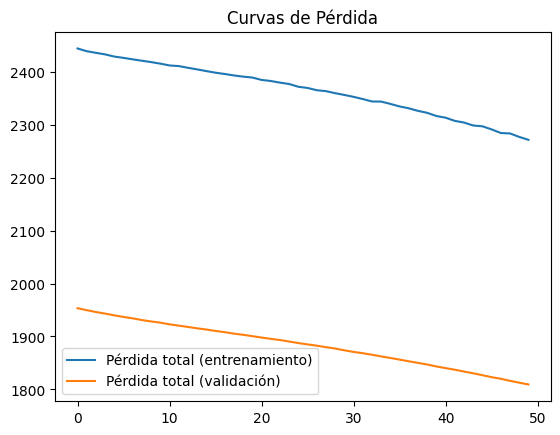

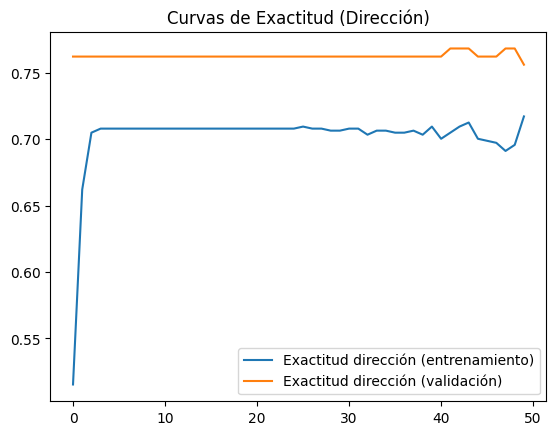

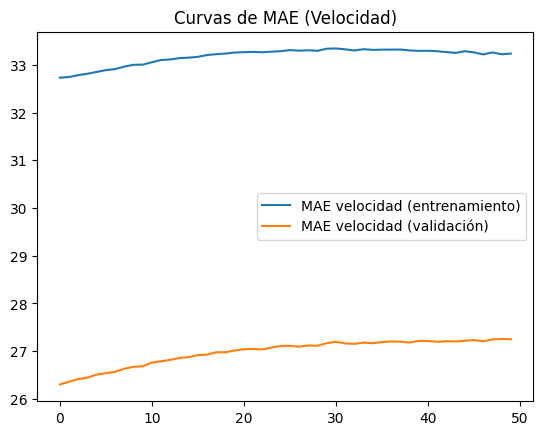

In [ ]:
import matplotlib.pyplot as plt

# Pérdida
plt.plot(history.history['loss'], label='Pérdida total (entrenamiento)')
plt.plot(history.history['val_loss'], label='Pérdida total (validación)')
plt.legend()
plt.title('Curvas de Pérdida')
plt.show()

# MAE de dirección
plt.plot(history.history['direction_accuracy'], label='Exactitud dirección (entrenamiento)')
plt.plot(history.history['val_direction_accuracy'], label='Exactitud dirección (validación)')
plt.legend()
plt.title('Curvas de Exactitud (Dirección)')
plt.show()

# Error absoluto de velocidad
plt.plot(history.history['speed_mae'], label='MAE velocidad (entrenamiento)')
plt.plot(history.history['val_speed_mae'], label='MAE velocidad (validación)')
plt.legend()
plt.title('Curvas de MAE (Velocidad)')
plt.show()
